In [1]:
import pandas as pd
import numpy as np

#Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#OVER SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#GridCV
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation.plot import grid_search
import matplotlib.pyplot as plt

#K-fold
from sklearn.model_selection import KFold

#Cross Val Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score



In [2]:
data = pd.read_csv('w2vjacnormalize.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Labeling,Product,W2Vec,Jaccard,Result,Hasil
0,0,3 ayam mie telor super merah tepung terigu gar...,0.88778987 -0.06354413 0.24728766 0.28880234...,0.578947,1.033849,0.503653
1,0,3 ayam mie telor super merah tepung terigu gar...,0.57615969 -0.04161003 -0.01158402 0.05458934...,0.521739,0.678731,0.427676
2,0,3 ayam mie telor super merah tepung terigu gar...,0.57615969 -0.04161003 -0.01158402 0.05458934...,0.428571,0.557529,0.401745
3,0,3 ayam mie telor super merah tepung terigu gar...,0.57615969 -0.04161003 -0.01158402 0.05458934...,0.333333,0.433634,0.375238
4,0,3 ayam mie telor super merah tepung terigu gar...,0.57615969 -0.04161003 -0.01158402 0.05458934...,0.647059,0.841760,0.462556


In [3]:
#RandomForest
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [RF]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = np.asarray(data['Result'])
        X = X.reshape(-1, 1)
        y = np.asarray(data['Labeling'])
        y = y.reshape(-1, 1)

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.4f" % (f, score_test2))

F1-Score Random Forest with Train size 0.70 : 0.7075
Precision Random Forest with Train size 0.70 : 0.7064
Recall Random Forest with Train size 0.70 : 0.7086
Accuracy Random Forest with Train size 0.70 : 0.7076
F1-Score Random Forest with Train size 0.70 : 0.5750
Precision Random Forest with Train size 0.70 : 0.5970
Recall Random Forest with Train size 0.70 : 0.5546
Accuracy Random Forest with Train size 0.70 : 0.7305
F1-Score Random Forest with Train size 0.70 : 0.5144
Precision Random Forest with Train size 0.70 : 0.5352
Recall Random Forest with Train size 0.70 : 0.4951
Accuracy Random Forest with Train size 0.70 : 0.7765


In [4]:
#SVM Classifier
SVM = SVC()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [SVM]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = np.asarray(data['Result'])
        X = X.reshape(-1, 1)
        y = np.asarray(data['Labeling'])
        y = y.reshape(-1, 1)

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score SVM with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision SVM with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall SVM with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy SVM with Train size %.2f : %.4f" % (f, score_test2))

F1-Score SVM with Train size 0.70 : 0.5593
Precision SVM with Train size 0.70 : 0.6802
Recall SVM with Train size 0.70 : 0.4748
Accuracy SVM with Train size 0.70 : 0.6266
F1-Score SVM with Train size 0.70 : 0.2601
Precision SVM with Train size 0.70 : 0.6726
Recall SVM with Train size 0.70 : 0.1612
Accuracy SVM with Train size 0.70 : 0.6984
F1-Score SVM with Train size 0.70 : 0.1627
Precision SVM with Train size 0.70 : 0.6855
Recall SVM with Train size 0.70 : 0.0923
Accuracy SVM with Train size 0.70 : 0.7728


In [5]:
#Smote for ss 0.02
RF = RandomForestClassifier()

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 3186, 1: 3186})
F1 Score =  0.6894736842105263
Precision =  0.6923890063424947
Recall =  0.6865828092243187
Accuracy =  0.6914225941422594


In [6]:
#Smote for ss 0.05
RF = RandomForestClassifier()

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 7967, 1: 7967})
F1 Score =  0.729497638471447
Precision =  0.7527691626052282
Recall =  0.7076218242399
Accuracy =  0.7364568081991215


In [7]:
#Smote SVC for ss 0.02
SVM = SVC()

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = %.4f" % (score_test1))
print("Precision = %.4f" % (score_test2))
print("Recall = %.4f" % (score_test3))
print("Accuracy = %.4f" % (score_test4))

Counter({0: 3186, 1: 3186})
F1 Score = 0.5687
Precision = 0.6648
Recall = 0.4969
Accuracy = 0.6240


In [8]:
#Smote SVC for ss 0.05
SVM = SVC()

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = %.4f" % (score_test1))
print("Precision = %.4f" % (score_test2))
print("Recall = %.4f" % (score_test3))
print("Accuracy = %.4f" % (score_test4))

Counter({0: 7967, 1: 7967})
F1 Score = 0.5695
Precision = 0.6770
Recall = 0.4915
Accuracy = 0.6269


Tuning Parameters

In [9]:
X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [1, 10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
dataku = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1)

In [10]:
dataku.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90],
                         'n_estimators': [1, 10, 50, 100]},
             scoring='f1')

In [11]:
dataku.best_params_

{'criterion': 'entropy', 'max_depth': 90, 'n_estimators': 50}

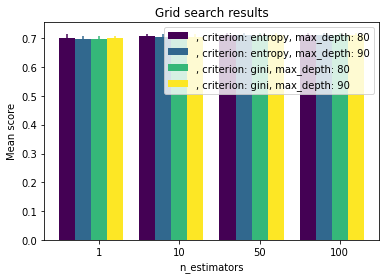

In [12]:
grid_search(dataku.cv_results_, change='n_estimators', kind='bar')
plt.show()

In [13]:
#Skor hasil tuning 
RF = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='entropy')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

0.7258402997634642


In [14]:
#SVM
X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [1.0, 2.0],
    'kernel': ['linear', 'rbf'],
    'degree': [1, 2, 3, 4]
}
# Create a based model
SV = SVC()
# Instantiate the grid search model
dataku2 = GridSearchCV(estimator = SV, param_grid = param_grid, scoring='f1',
                          cv = 5)

In [15]:
dataku2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0], 'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [16]:
dataku2.best_params_

{'C': 2.0, 'degree': 1, 'kernel': 'rbf'}

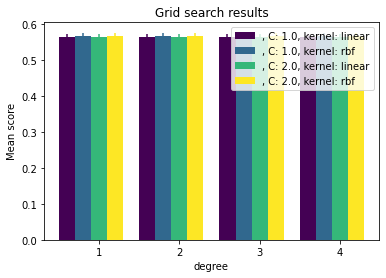

In [17]:
grid_search(dataku2.cv_results_, change='degree', kind='bar')
plt.show()

In [18]:
#RF 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='entropy')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(rf, X, y, cv=kfold, scoring="f1").mean())

0.7329607365413708


In [19]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

sv = SVC(C = 2.0,
        kernel = 'rbf',
        degree = 1
        )
sv.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(sv, X, y, cv=kfold, scoring="f1").mean())

0.5625511427105055


Perbandingan Performa Terbaik

In [20]:
#Model Default

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.73557387 0.72490222 0.74012612 0.71483871 0.73928456]
0.7311584971358407
[0.7352381  0.72490222 0.73988056 0.71612903 0.73959342]
0.7314258380123883
[0.73437004 0.72448647 0.74029851 0.7158981  0.73901809]
0.7306218837466203
[0.73437004 0.72466601 0.7399535  0.71571475 0.73911641]
0.7312458442361949


In [21]:
#Model dengan Tuning parameter RandomForest

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
RF = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='entropy')

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.74121406 0.73914463 0.72526042 0.72880259 0.75903614]
0.739074712323381
[0.74291176 0.73986928 0.72549658 0.72508926 0.76      ]
0.7389524242350431
[0.74394904 0.74020888 0.72685789 0.72632944 0.7599112 ]
0.7402382607554635
[0.74497287 0.74054759 0.72626427 0.72715447 0.76      ]
0.7389744237106852


In [22]:
#Model Default SVM

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC()

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.565107   0.56318481 0.56575496 0.55042482 0.55717407]
0.5603291334204907
[0.565107   0.56318481 0.56575496 0.55042482 0.55717407]
0.5603291334204907
[0.565107   0.56318481 0.56575496 0.55042482 0.55717407]
0.5603291334204907
[0.565107   0.56318481 0.56575496 0.55042482 0.55717407]
0.5603291334204907


In [ ]:
#Model dengan Tuning parameter SVM

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

In [ ]:
[0.55563744 0.5658284  0.53016591 0.55703704 0.56361648]
0.5544570531501409

Model performa terbaik

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
RF = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='entropy')

In [29]:
kFold = 5
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall").mean())

[0.73400251 0.72874757 0.72691552 0.72942683 0.72616763]
0.7287937406516604
[0.73580169 0.73642924 0.73988077 0.73266395 0.7306968 ]
0.7350318531557994
[0.74665818 0.75083278 0.74364123 0.74424721 0.75      ]
0.7467033497765393
[0.72564735 0.70888469 0.71373556 0.71653048 0.70602859]
0.712277514542821


In [26]:
#SVM
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')

In [27]:
kFold = 5
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall").mean())

[0.55184917 0.5673913  0.5729808  0.55941499 0.58911954]
0.5681511614402741
[0.61217446 0.625353   0.63005962 0.62190147 0.63967357]
0.6258324238200113
[0.66989437 0.66751918 0.65752286 0.66870629 0.69451477]
0.6716314937879033
[0.46917386 0.49338374 0.50770218 0.48082967 0.51149782]
0.49251745524819446


Visualisasi ROC

In [12]:
X = np.asarray(data['Result'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
# Membandingkan Decision Tree dengan berbagai train size
RF = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='gini')
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf', probability=True)

train_size = [0.7]
rforest = [RF, SVM]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)
    if rf == RF: print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == SVM: print("F1-Score SVM with Train size %.2f : %.3f%%" % (f, score_test1*100))

F1-Score Random Forest with Train size 0.70 : 72.563%
F1-Score NB with Train size 0.70 : 55.985%


In [18]:
rf_probs1 = RF.predict_proba(X_test)
rf_probs1 = rf_probs1[:, 1]
svm_probs1 = SVM.predict_proba(X_test)
svm_probs1 = svm_probs1[:, 1]

In [19]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
svm_auc1 = roc_auc_score(y_test,svm_probs1)

print('Random Forest = %.3f' % (rf_auc1))
print('SVM = %.3f' % (svm_auc1))

Random Forest = 0.796
SVM = 0.661


In [20]:
rf_rpr1, rf_tpr1, _ = roc_curve(y_test, rf_probs1)
nb_rpr1, nb_tpr1, _ = roc_curve(y_test, svm_probs1)

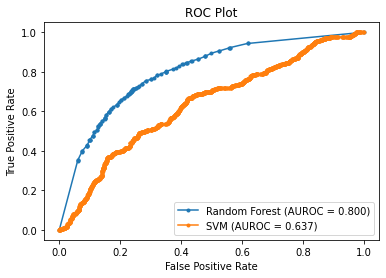

In [16]:
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'SVM (AUROC = %0.3f)' % svm_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()